In [1]:
import pandas as pd
import numpy as np

import plotly.graph_objs as go
import plotly.offline as py
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

In [2]:
top200 = pd.read_csv('spotify_2019_2020_top200.csv')
tracks = pd.read_csv('track_features.csv')
artist = pd.read_csv('artist_features.csv')

In [3]:
del top200['URL'], tracks['analysis_url'], tracks['0'], tracks['track_href'], tracks['uri'], tracks['type'], tracks['id']

In [4]:
top200 = top200[top200['date']<='2019-12-31']

In [5]:
top200.shape, tracks.shape, artist.shape

((73000, 7), (3010, 14), (2159, 5))

In [6]:
top200.head(2)

Position                                     Track Name       Artist  \
0         1  Sunflower - Spider-Man: Into the Spider-Verse  Post Malone   
1         2                                           Wow.  Post Malone   

   Streams        date region                track_id  
0  1867789  2019-01-01    USA  3KkXRkHbMCARz0aVfEt68P  
1  1564946  2019-01-01    USA  6MWtB6iiXyIwun0YzU6DFP

In [7]:
tracks.head(2)

acousticness  danceability  duration_ms  energy  instrumentalness   key  \
0         0.556         0.760     158040.0   0.479          0.000000   2.0   
1         0.163         0.833     149520.0   0.539          0.000002  11.0   

   liveness  loudness  mode  speechiness   tempo  time_signature  \
0    0.0703    -5.574   1.0       0.0466  89.911             4.0   
1    0.1010    -7.399   0.0       0.1780  99.947             4.0   

                 track_id  valence  
0  3KkXRkHbMCARz0aVfEt68P    0.913  
1  6MWtB6iiXyIwun0YzU6DFP    0.385

In [8]:
artist.head(2)

artist       genres  popularity  followers               artist_id
0  Post Malone      dfw rap          95   25778831  246dkjvS1zLTtiykXe5h60
1  Post Malone  melodic rap          95   25778831  246dkjvS1zLTtiykXe5h60

In [9]:
df = artist.groupby('artist')['genres'].apply(','.join).reset_index()
del artist['genres']
artist = artist.merge(df, on='artist',how='left').rename(columns={'artist':'Artist'})
artist = artist.drop_duplicates()
artist.head(2)

Artist  popularity  followers               artist_id  \
0   Post Malone          95   25778831  246dkjvS1zLTtiykXe5h60   
3  Travis Scott          98   10123878  0Y5tJX1MQlPlqiwlOH1tJY   

                    genres  
0  dfw rap,melodic rap,rap  
3                      rap

In [10]:
#final = top200.merge(tracks, on = 'track_id', how='left')
#final = final.merge(artist, on = 'Artist', how='left')
#final.shape

In [11]:
#final.head(2)

# Position Curve for Number One Tracks

In [12]:
num_one_tracks = top200[top200['Position']==1]
num_one_tracks.head(2)

Position                                     Track Name       Artist  \
0           1  Sunflower - Spider-Man: Into the Spider-Verse  Post Malone   
200         1  Sunflower - Spider-Man: Into the Spider-Verse  Post Malone   

     Streams        date region                track_id  
0    1867789  2019-01-01    USA  3KkXRkHbMCARz0aVfEt68P  
200  1925187  2019-01-02    USA  3KkXRkHbMCARz0aVfEt68P

In [13]:
df = top200[top200['Track Name'].isin(num_one_tracks['Track Name'])]

import plotly.express as px
fig = px.scatter(df, x="date", y="Position", animation_frame="Track Name",
           size="Position", color='Track Name'
           )
fig.update_layout(showlegend=False, width=1000,   height=500)

In [14]:
print(num_one_tracks['Track Name'].nunique(), 'songs reached number one position in 2019')

34 songs reached number one position in 2019


if we look at the timeseries, we can see that most of these tracks entered the charts at or near the number 1 position, 
then dropped lower over time. 
One obvious exception to this pattern is All I Want for Christmas Is You. 
Some listeners were getting into the Christmas spirit early, causing it to enter the charts around rank 90 in early November. 
The track then gradually climbed the ranks as it got closer to Christmas, unsurprisingly hitting number 1 in the week 
leading up to Christmas day. It was back down to 30 by New Year’s Eve.

# Top 15 Spotify Track Streams 

In [15]:
df2 = top200[top200['date']<='2019-12-31']
df2['date'] = pd.to_datetime(df2['date'])
df2['Month'] = df2['date'].dt.month
df = df2[['Track Name','Month','Streams']].groupby(['Track Name','Month']).sum().groupby(level=[0]).cumsum().reset_index().sort_values(by='Streams',ascending=False) #gives cumulative sum 

In [16]:
#Let's get a list of 30 RGB (plus alpha) color values from the tab20 colormap. 
#To do so, first get the colormap and then pass it a sequence of values between 0 and 1. 
#Here, we use np.linspace to create 30 equally-spaced values between .1 and 2 that represent that portion of the colormap.
from matplotlib import cm
my_colors = cm.tab20(np.linspace(0.1, 2, 30))

In [17]:
#fig, ax = plt.subplots(figsize=(15, 9))
def draw_barchart(month):
    month_name = datetime.date(1900, month, 1).strftime('%B')
    dff = df[df['Month'].eq(month)].sort_values(by='Streams', ascending=True).tail(15)
    ax.clear()
    ax.barh(dff['Track Name'], dff['Streams'], color= my_colors)
    dx = dff['Streams'].max() / 200
    for i, (value, name) in enumerate(zip(dff['Streams'], dff['Track Name'])):
        ax.text(value-dx, i,     name,           size=10, weight=300, ha='right', va='top')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=10, ha='left',  va='top')
    #enhancing visual effects by changing styles of different axis objects
    #set the Month Name
    ax.text(1, 0.4, month_name, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=700)
    #ax.text(0, 1.06, 'Track Streams', transform=ax.transAxes, size=12, color='#777777')
    #hide the text
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    #move x axis to top
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    #hide y axis
    ax.set_yticks([])
    ax.margins(0, 0.01)
    #add grid lines
    #ax.grid(which='major', axis='x', linestyle='-')
    #ax.set_axisbelow(True)
    ax.text(0, 1.12, 'Top 15 Spotify Track Streams - 2019',  transform=ax.transAxes, size=24, weight=600, ha='left')
    plt.box(False)

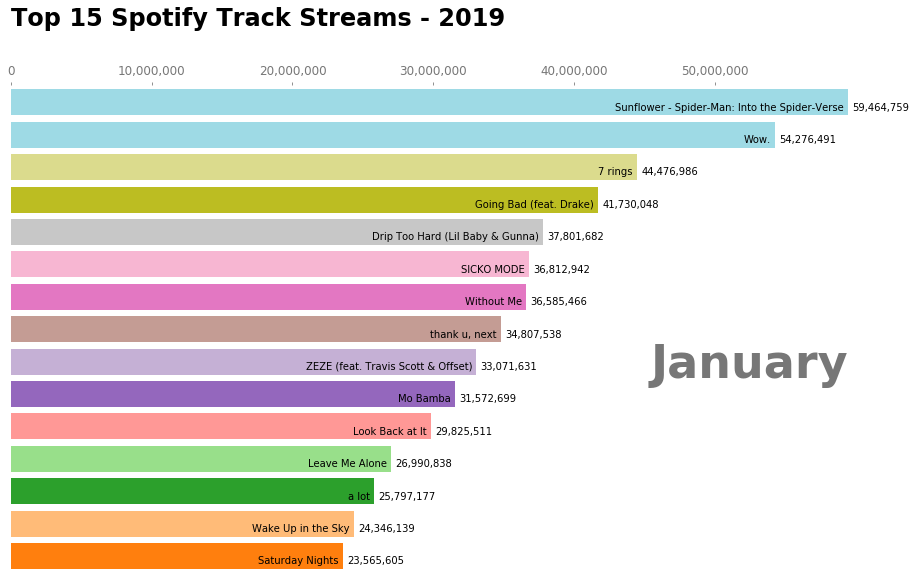

In [19]:
import datetime
from matplotlib.animation import PillowWriter  
import matplotlib.ticker as ticker
import matplotlib.animation as animation

fig, ax = plt.subplots(figsize=(15, 9))
animator = animation.FuncAnimation(fig, draw_barchart, frames= range(1,13), interval = 5000)

animator.save('track_streams.gif', writer=PillowWriter())

# What makes the Song Number one?

Here, I sorted the number one tracks on number of streams and considered only one track for the artist

In [21]:
df = num_one_tracks.sort_values(by='Streams',ascending=False)
df = df[['Track Name','Artist','track_id','Streams']].drop_duplicates()
df.head(5)

Track Name         Artist                track_id  Streams
3600               7 rings  Ariana Grande  14msK75pk3pA33pzPVNtBF  3961641
55200  HIGHEST IN THE ROOM   Travis Scott  3eekarcy7kvN4yt5ZFzltW  3939490
7600               7 rings  Ariana Grande  6ocbgoVGwYJhOv1GgI9NsF  3852476
3400               7 rings  Ariana Grande  14msK75pk3pA33pzPVNtBF  3847877
4800          MIDDLE CHILD        J. Cole  2JvzF1RMd7lE3KmFlsyZD8  3800251

In [22]:
df = df[['Track Name','Artist','track_id','Streams']].groupby(['Track Name','Artist']).agg({'track_id':'min','Streams':'sum'}).reset_index().sort_values(by='Streams',ascending=False)
df = df.merge(tracks, on = 'track_id', how='left')
df.shape

(34, 17)

In [23]:
df.head(2)

Track Name         Artist                track_id   Streams  acousticness  \
0    7 rings  Ariana Grande  14msK75pk3pA33pzPVNtBF  86758267         0.578   
1    Circles    Post Malone  0Yde1VrWbGF2Tus2AQhMuT  68753434         0.222   

   danceability  duration_ms  energy  instrumentalness  key  liveness  \
0         0.725     178640.0   0.321           0.00000  1.0    0.0884   
1         0.703     215280.0   0.756           0.00281  0.0    0.0829   

   loudness  mode  speechiness    tempo  time_signature  valence  
0   -10.744   0.0       0.3230   70.142             4.0    0.319  
1    -3.407   1.0       0.0376  119.999             4.0    0.536

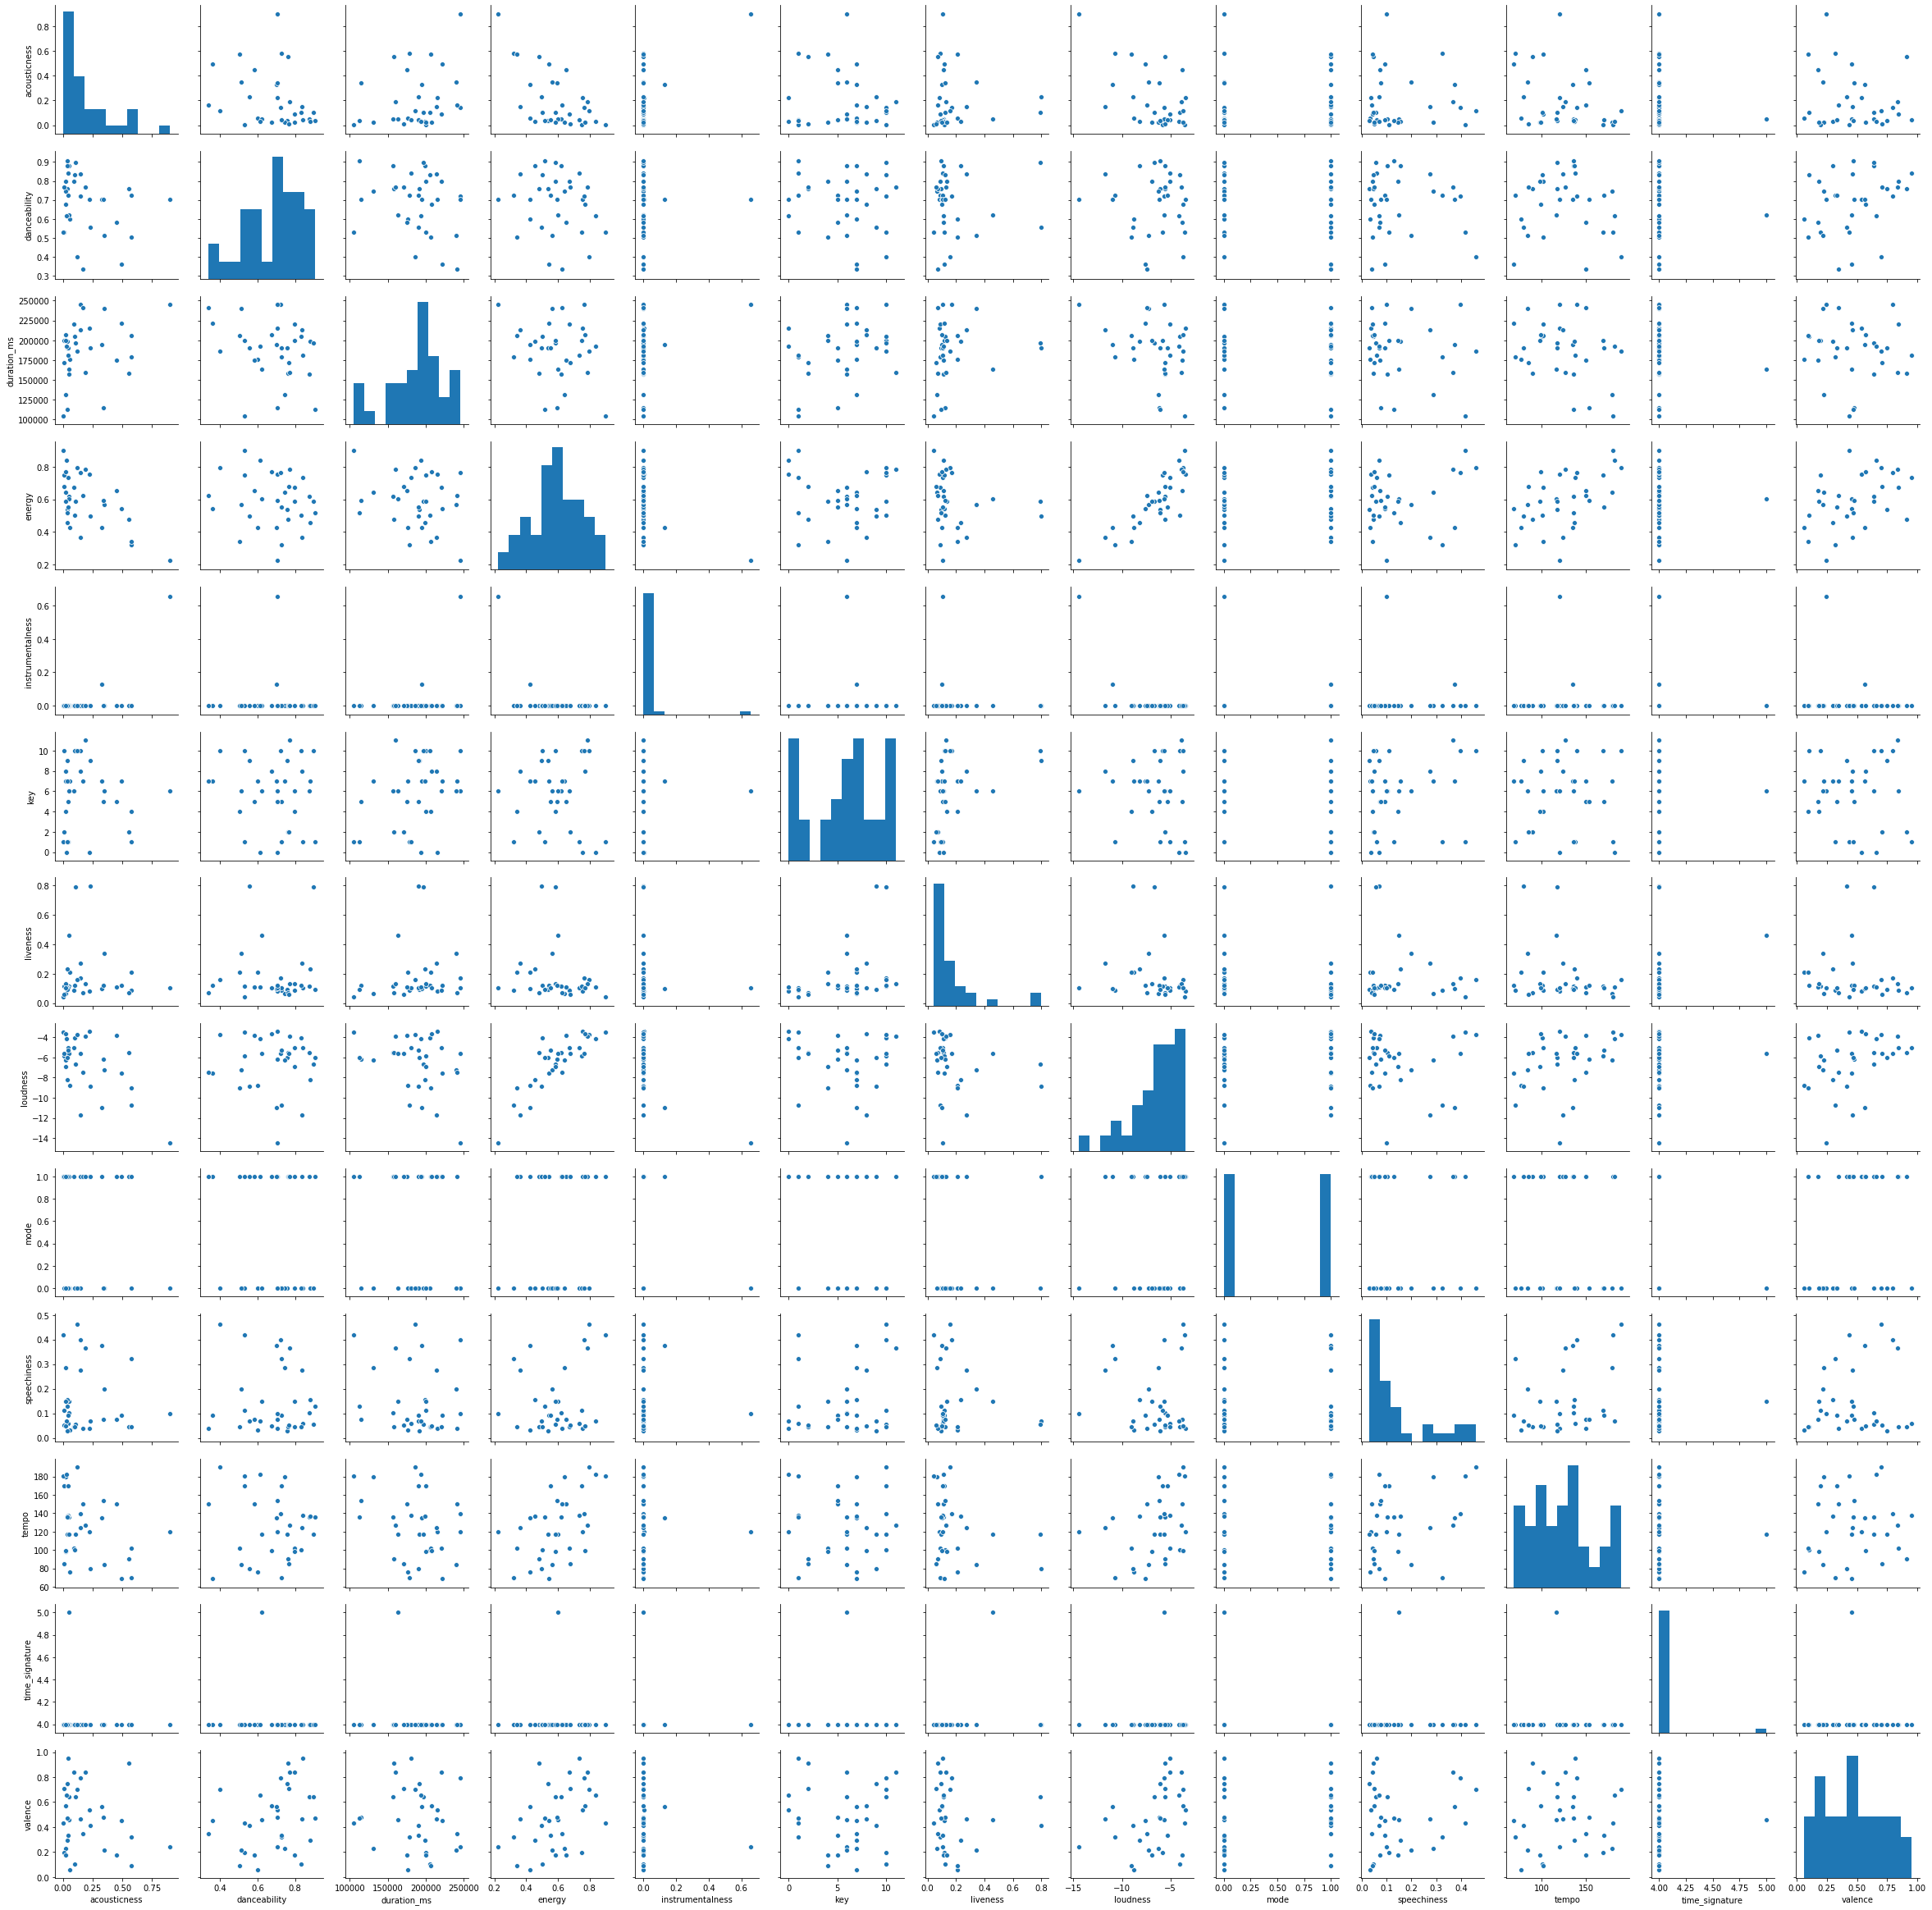

In [24]:
#pair plots
pp = df.loc[:,df.columns[4:]]
sns.pairplot(pp)

A few observations from the scatterplot are as follows:

1. Time-signature — Almost all the songs seem to have a common time-signature of 4. 
    Hence, I dropped this parameter from consideration.
2. Instrumentalness — Most of the songs seem to have a value close to or equal to 0. Again, dropping the parameter.
3. Mode is a binary value. Therefore, dropping it as well
4. Energy and Loudness is highely proportional. Therefore, dropping loudness
5. duration of the tracks is also dropped

# Radar Chart for Top15 number one tracks

In [25]:
#scaling the feature tempo 
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = MinMaxScaler()
df[['tempo']] = scaler.fit_transform(df[['tempo']])

In [26]:
df = df.head(15)
df.head(2)

Track Name         Artist                track_id   Streams  acousticness  \
0    7 rings  Ariana Grande  14msK75pk3pA33pzPVNtBF  86758267         0.578   
1    Circles    Post Malone  0Yde1VrWbGF2Tus2AQhMuT  68753434         0.222   

   danceability  duration_ms  energy  instrumentalness  key  liveness  \
0         0.725     178640.0   0.321           0.00000  1.0    0.0884   
1         0.703     215280.0   0.756           0.00281  0.0    0.0829   

   loudness  mode  speechiness     tempo  time_signature  valence  
0   -10.744   0.0       0.3230  0.013471             4.0    0.319  
1    -3.407   1.0       0.0376  0.423503             4.0    0.536

In [27]:
labels = ['acousticness', 'danceability', 'energy','liveness',   'speechiness', 'valence', 'tempo']

In [28]:
layout = go.Layout(
    title=go.layout.Title(
        text="Track Features for Num One Tracks",
        x=0.5
    ),
    font=dict(size=10),
    width=900,
    height=600,
)

charts = []
for i in range(0,df.shape[0]):
    data = go.Scatterpolar(
            r = [df['acousticness'].values[i],df['danceability'].values[i],df['energy'].values[i],
            df['liveness'].values[i],df['speechiness'].values[i],  df['valence'].values[i], df['tempo'].values[i]
                ],
                  theta = labels, fill = 'toself', showlegend=True, name = df.loc[i]['Track Name'])
    charts.append(data)
    
import plotly.offline as py

fig = dict(data=charts, layout=layout)
py.iplot(fig)    

1. All the songs are high on Danceability and low on acousticness
2. Barring the track 'ROXANNE', all songs are low on liveness and speechiness
3. Valence and Tempo are spread out whereas energy is mid-high

To make a number one song, it should be high energy dance number with low acousticness i.e contains electric sound. 
Low on liveness i.e should not be performed live but must be recorded in a studio and 
speechiness must be low i.e must contain more music and less speech.

# Clustering the songs to similiar groups

In [29]:
#aggregating the tracks on artist and track name and condering only the first track 
agg_artist_tracks = top200.groupby(['Artist','Track Name']).agg({'Streams':'sum','track_id':'first'}).sort_values(by='Streams',ascending=False).reset_index()
agg_artist_tracks[agg_artist_tracks['Track Name']=='7 rings']

Artist Track Name    Streams                track_id
2  Ariana Grande    7 rings  280698165  14msK75pk3pA33pzPVNtBF

In [30]:
agg_artist_tracks.shape

(1824, 4)

In [31]:
track_artist = agg_artist_tracks.drop_duplicates()
tracks.shape, track_artist.shape

((3010, 14), (1824, 4))

In [32]:
df_tracks = track_artist.merge(tracks, how='left', on='track_id')
df_tracks.shape

(1824, 17)

In [33]:
#removing null values
df_tracks = df_tracks[df_tracks['acousticness'].notnull()]

In [34]:
np.sum(df_tracks.isnull())

Artist              0
Track Name          0
Streams             0
track_id            0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [35]:
#scaling the feature tempo 
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = MinMaxScaler()
df_tracks['tempo'] = scaler.fit_transform(df_tracks[['tempo']])

In [36]:
cluster_features = ['acousticness', 'danceability', 'energy','liveness','speechiness', 'valence','tempo']

In [37]:
df_cluster = df_tracks[cluster_features]

In [38]:
df_cluster.shape

(1824, 7)

In [39]:
df_cluster.head()

acousticness  danceability  energy  liveness  speechiness  valence  \
0         0.556         0.760   0.479    0.0703       0.0466    0.913   
1         0.163         0.833   0.539    0.1010       0.1780    0.385   
2         0.578         0.725   0.321    0.0884       0.3230    0.319   
3         0.149         0.837   0.364    0.2710       0.2760    0.463   
4         0.328         0.701   0.425    0.1000       0.3750    0.562   

      tempo  
0  0.232255  
1  0.286221  
2  0.125954  
3  0.415471  
4  0.475394

In [40]:
X = np.array(df_cluster)
#pca
from sklearn.decomposition import PCA
pca = PCA(n_components=3, random_state=123)
Y_sklearn = pca.fit_transform(X)


In [41]:
print(pca.explained_variance_ratio_.sum())
pca.explained_variance_ratio_

0.7084202570494287


array([0.4059878 , 0.19268033, 0.10975212])

Almost 30% of the data is lost due to PCA

# Elbow Method to identify Optimal number of Clusters

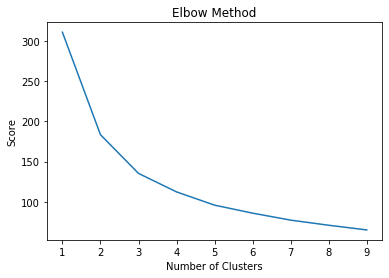

In [42]:
number_clusters = range(1, 10)

kmeans = [KMeans(n_clusters=i, max_iter = 600) for i in number_clusters]
kmeans

score = [kmeans[i].fit(Y_sklearn).score(Y_sklearn) for i in range(len(kmeans))]
score = [i*-1 for i in score]

plt.plot(number_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Method')
plt.show()

In [43]:
from sklearn.metrics import silhouette_score
n_cluster = 3

# KMeans

Wall time: 55.9 ms


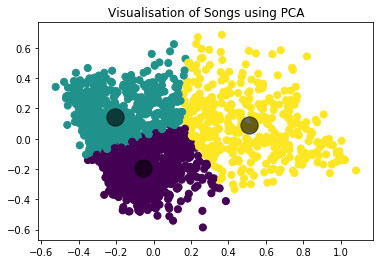

In [44]:

#sklearn_pca = PCA(n_components = 2)
#Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)

kmeans = KMeans(n_clusters=n_cluster, max_iter=600, algorithm='auto')
%time fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)

plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1],c=prediction ,s=50, cmap='viridis')
plt.title('Visualisation of Songs using PCA')

centers2 = fitted.cluster_centers_
plt.scatter(centers2[:, 0], centers2[:, 1],c='black', s=300, alpha=0.6);


kmeans_sil = silhouette_score(Y_sklearn, kmeans.labels_)

# Affinity Propagation

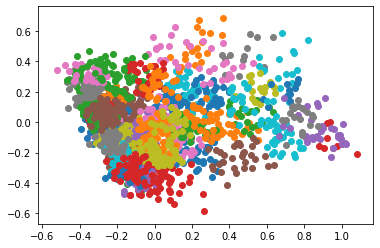

In [45]:
from sklearn.cluster import AffinityPropagation
# define the model
aff = AffinityPropagation(damping=0.9)
# fit the model
aff.fit(Y_sklearn)
# assign a cluster to each example
yhat = aff.predict(Y_sklearn)
# retrieve unique clusters
clusters = np.unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(yhat == cluster)
    # create scatter of these samples
    plt.scatter(Y_sklearn[row_ix, 0], Y_sklearn[row_ix, 1])
# show the plot
plt.show()

aff_sil = silhouette_score(Y_sklearn, aff.labels_)

# Agglomerative Clustering

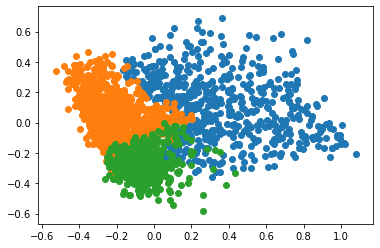

In [46]:
from sklearn.cluster import AgglomerativeClustering
# define the model
agg = AgglomerativeClustering(n_clusters=n_cluster)
# fit model and predict clusters
yhat = agg.fit_predict(Y_sklearn)
# retrieve unique clusters
clusters = np.unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(yhat == cluster)
    # create scatter of these samples
    plt.scatter(Y_sklearn[row_ix, 0], Y_sklearn[row_ix, 1])
# show the plot
plt.show()
agg_sil = silhouette_score(Y_sklearn, aff.labels_)

# BIRCH

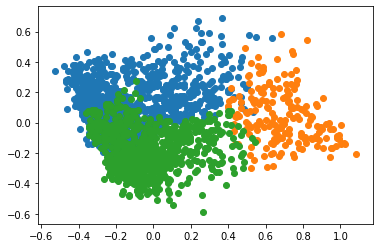

In [47]:
from sklearn.cluster import Birch
# define the model
birch = Birch(threshold=0.01, n_clusters=n_cluster)
# fit the model
birch.fit(Y_sklearn)
# assign a cluster to each example
yhat = birch.predict(Y_sklearn)
# retrieve unique clusters
clusters = np.unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(yhat == cluster)
    # create scatter of these samples
    plt.scatter(Y_sklearn[row_ix, 0], Y_sklearn[row_ix, 1])
# show the plot
plt.show()
birch_sil = silhouette_score(Y_sklearn, birch.labels_)

# DBSCAN

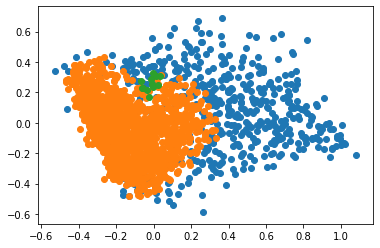

In [48]:
from sklearn.cluster import DBSCAN
# define the model
dbscan = DBSCAN(eps=0.10, min_samples=15)
# fit model and predict clusters
yhat = dbscan.fit_predict(Y_sklearn)
# retrieve unique clusters
clusters = np.unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(yhat == cluster)
    # create scatter of these samples
    plt.scatter(Y_sklearn[row_ix, 0], Y_sklearn[row_ix, 1])
# show the plot
plt.show()
dbscan_sil = silhouette_score(Y_sklearn, dbscan.labels_)

# HDBSCAN

C:\Users\divya\AppData\Roaming\Python\Python36\site-packages\sklearn\externals\six.py:31: DeprecationWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

C:\Users\divya\AppData\Roaming\Python\Python36\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning:

sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.



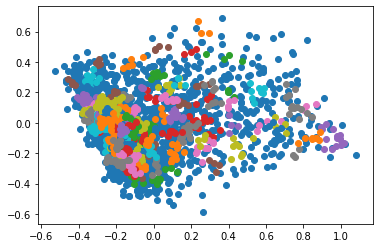

In [49]:
import hdbscan
# define the model
hdbscan = hdbscan.HDBSCAN(min_cluster_size=n_cluster)
# fit model and predict clusters
yhat = hdbscan.fit_predict(Y_sklearn)
# retrieve unique clusters
clusters = np.unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(yhat == cluster)
    # create scatter of these samples
    plt.scatter(Y_sklearn[row_ix, 0], Y_sklearn[row_ix, 1])
# show the plot
plt.show()
hdbscan_sil = silhouette_score(Y_sklearn, hdbscan.labels_)

# Mini-Batch K-Means

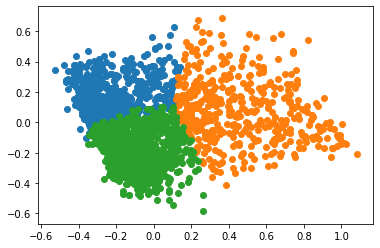

In [50]:
from sklearn.cluster import MiniBatchKMeans
# define the model
mini_kmeans = MiniBatchKMeans(n_clusters=n_cluster)
# fit the model
mini_kmeans.fit(Y_sklearn)
# assign a cluster to each example
yhat = mini_kmeans.predict(Y_sklearn)
# retrieve unique clusters
clusters = np.unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(yhat == cluster)
    # create scatter of these samples
    plt.scatter(Y_sklearn[row_ix, 0], Y_sklearn[row_ix, 1])
# show the plot
plt.show()
mini_kmeans_sil = silhouette_score(Y_sklearn, mini_kmeans.labels_)

# OPTICS

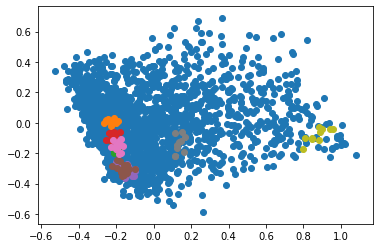

In [51]:
from sklearn.cluster import OPTICS
# define the model
optics = OPTICS(eps=0.8, min_samples=10)
# fit model and predict clusters
yhat = optics.fit_predict(Y_sklearn)
# retrieve unique clusters
clusters = np.unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(yhat == cluster)
    # create scatter of these samples
    plt.scatter(Y_sklearn[row_ix, 0], Y_sklearn[row_ix, 1])
# show the plot
plt.show()
optics_sil = silhouette_score(Y_sklearn, optics.labels_)

# Spectral

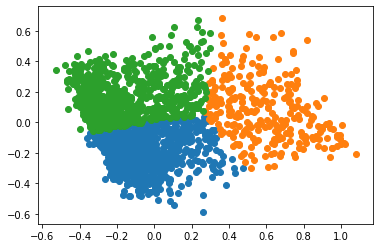

In [52]:
from sklearn.cluster import SpectralClustering
# define the model
spec = SpectralClustering(n_clusters=n_cluster)
# fit model and predict clusters
yhat = spec.fit_predict(Y_sklearn)
# retrieve unique clusters
clusters = np.unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(yhat == cluster)
    # create scatter of these samples
    plt.scatter(Y_sklearn[row_ix, 0], Y_sklearn[row_ix, 1])
# show the plot
plt.show()
spec_sil = silhouette_score(Y_sklearn, spec.labels_)

# Gaussian Mixture Model

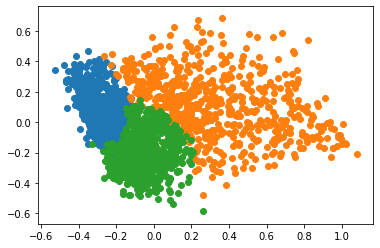

In [53]:
from sklearn.mixture import GaussianMixture
# define the model
gau = GaussianMixture(n_components=n_cluster)
# fit the model
gau.fit(Y_sklearn)
# assign a cluster to each example
yhat = gau.predict(Y_sklearn)
# retrieve unique clusters
clusters = np.unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(yhat == cluster)
    # create scatter of these samples
    plt.scatter(Y_sklearn[row_ix, 0], Y_sklearn[row_ix, 1])
# show the plot
plt.show()
gau_sil = silhouette_score(Y_sklearn, yhat)

# Silhoutette Score for different Clustering Algorithm

In [54]:
data = {'labels' : ['kmeans','affinity','agglomerative','dbscan','hdbscan','mini batch kmeans','optics','spectral','gaussian'], 
        'values' : [kmeans_sil,aff_sil,agg_sil,dbscan_sil,hdbscan_sil,mini_kmeans_sil,optics_sil,spec_sil,gau_sil]}
df_sil = pd.DataFrame(data)
df_sil.sort_values(by='values',ascending=False)

labels    values
0             kmeans  0.309128
5  mini batch kmeans  0.300204
7           spectral  0.300185
8           gaussian  0.250133
1           affinity  0.233892
2      agglomerative  0.233892
3             dbscan  0.059391
4            hdbscan -0.327435
6             optics -0.447163

K-means and Mini batch K-means are the best performing algorithm

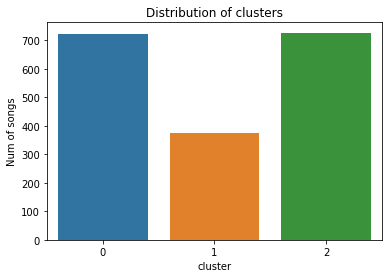

In [55]:
# assign label to  dataframe
df_tracks.loc[:,'cluster'] = kmeans.fit_predict(Y_sklearn)
df_cluster_size = df_tracks.groupby('cluster').size().reset_index(name='Num of songs')
sns.barplot(data=df_cluster_size, x='cluster', y='Num of songs')
plt.title('Distribution of clusters')
plt.show()

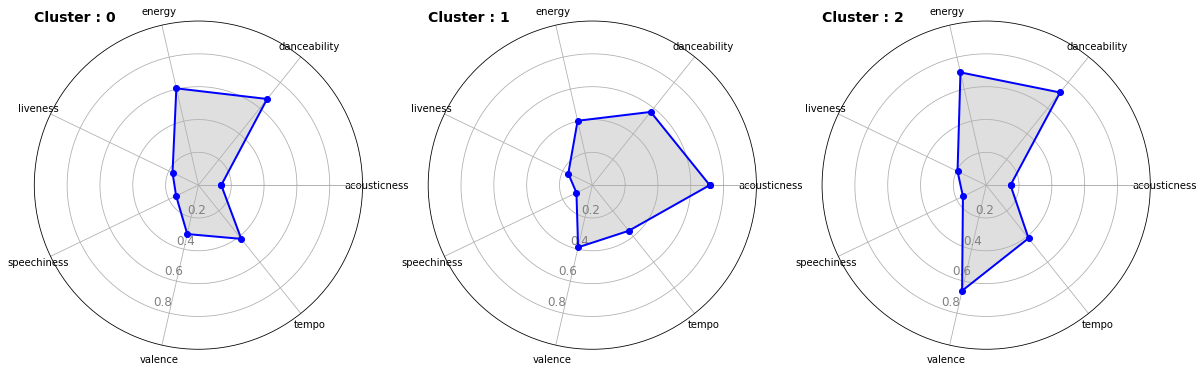

In [56]:
#Plotting radar chart for each cluster
fig=plt.figure(figsize = (20,11))
for key, i in enumerate(df_tracks.cluster.unique()):
    stats = df_tracks[df_tracks['cluster']==i][cluster_features].mean().tolist()
    angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
    
    # close the plot
    stats=np.concatenate((stats,[stats[0]]))
    angles=np.concatenate((angles,[angles[0]]))

    #Size of the figure
    ax = fig.add_subplot(1,3,i+1, polar=True)
    ax.plot(angles, stats, 'o-', linewidth=2, color= 'blue')
    ax.fill(angles, stats, alpha=0.25, facecolor='gray')
    ax.set_thetagrids(angles * 180/np.pi, cluster_features , fontsize = 10)
    ax.set_rlabel_position(250)
    plt.yticks([0.2 , 0.4 , 0.6 , 0.8  ], ["0.2",'0.4', "0.6", "0.8"], color="grey", size=12)
    plt.ylim(0,1)
    ax.text(0, 1, 'Cluster'+' : '+str(i),  transform=ax.transAxes, size=14, weight=600)

It can be seen that:
1. cluster 0 is low in valence which means all angry, sad songs belong to cluster 0
2. cluster 1 has all songs with high acousticness i.e all natural sounds that might include 
    piano, orchestra and unprocessed human voice and low energy
3. cluster 2 is high in energy, danceability and valence i.e positive joyful songs

# Classification of the Tracks into one of the Clusters

In [57]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [58]:
data_df = df_tracks.copy()

In [59]:
data_df.shape

(1824, 18)

In [60]:
data_df.head(2)

Artist                                     Track Name    Streams  \
0  Post Malone  Sunflower - Spider-Man: Into the Spider-Verse  389059531   
1  Post Malone                                           Wow.  297846574   

                 track_id  acousticness  danceability  duration_ms  energy  \
0  3KkXRkHbMCARz0aVfEt68P         0.556         0.760     158040.0   0.479   
1  6MWtB6iiXyIwun0YzU6DFP         0.163         0.833     149520.0   0.539   

   instrumentalness   key  liveness  loudness  mode  speechiness     tempo  \
0          0.000000   2.0    0.0703    -5.574   1.0       0.0466  0.232255   
1          0.000002  11.0    0.1010    -7.399   0.0       0.1780  0.286221   

   time_signature  valence  cluster  
0             4.0    0.913        2  
1             4.0    0.385        0

In [61]:
y = data_df.cluster
X = data_df[['energy', 'liveness', 'tempo', 'speechiness'
            , 'acousticness', 'instrumentalness', 'danceability','key', 'duration_ms' ,'loudness', 'mode', 'valence']]

In [62]:
X.head()

energy  liveness     tempo  speechiness  acousticness  instrumentalness  \
0   0.479    0.0703  0.232255       0.0466         0.556          0.000000   
1   0.539    0.1010  0.286221       0.1780         0.163          0.000002   
2   0.321    0.0884  0.125954       0.3230         0.578          0.000000   
3   0.364    0.2710  0.415471       0.2760         0.149          0.000000   
4   0.425    0.1000  0.475394       0.3750         0.328          0.130000   

   danceability   key  duration_ms  loudness  mode  valence  
0         0.760   2.0     158040.0    -5.574   1.0    0.913  
1         0.833  11.0     149520.0    -7.399   0.0    0.385  
2         0.725   1.0     178640.0   -10.744   0.0    0.319  
3         0.837   8.0     213594.0   -11.713   1.0    0.463  
4         0.701   7.0     194088.0   -10.965   1.0    0.562

In [63]:
# dividing X, y into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# Decision Tree Classifier

In [64]:
tree_model = DecisionTreeClassifier(max_depth = 5).fit(X_train, y_train)
tree_predictions = tree_model.predict(X_test)

In [65]:
accuracy_score(y_test, tree_predictions)

0.9539473684210527

In [66]:
# creating a confusion matrix
confusion_matrix = confusion_matrix(y_test, tree_predictions)

In [67]:
confusion_matrix

array([[174,   3,   1],
       [  6,  84,   3],
       [  7,   1, 177]], dtype=int64)

In [68]:
#Using 2020 data for Prediction
test_2020 = pd.read_csv('spotify_2019_2020_top200.csv')
test_2020 = test_2020[test_2020['date']>='2020-01-01']
test_2020 = test_2020.merge(tracks, on = 'track_id', how='left')
test_2020 = test_2020[test_2020['acousticness'].notnull()]

Xtest_2020 = test_2020[['energy', 'liveness', 'tempo', 'speechiness' , 'acousticness', 'instrumentalness', 'danceability','key', 'duration_ms' ,'loudness', 'mode', 'valence']]
Xtest_2020.shape

(30397, 12)

In [69]:
#fit model to the new data to predict clusters
tree_predictions = tree_model.predict(Xtest_2020)
test_2020['cluster'] = tree_predictions

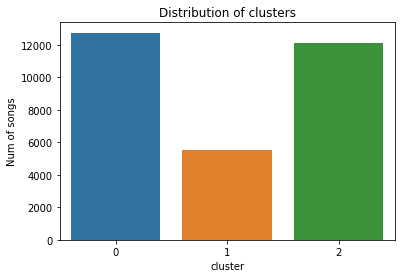

In [70]:
# assign label to recent dataframe
df_cluster_size = test_2020.groupby('cluster').size().reset_index(name='Num of songs')
sns.barplot(data=df_cluster_size, x='cluster', y='Num of songs')
plt.title('Distribution of clusters')
plt.show()